# Visualizations, version 3

## Setup packages.

In [1]:
require(data.table)
require(magrittr)

require(ggplot2)
require(GGally)

Loading required package: data.table
Loading required package: magrittr
Loading required package: ggplot2
Loading required package: GGally
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


## Read data tables.

### 2D dataset.

In [2]:
xs2d <- fread("xs-2d-20200322a.csv")[, case:=factor(case)]
xs2d %>% dim

[1] 121   3

In [3]:
ys2d <- fread("ys-2d-20200322a.csv")[, case:=factor(case)]
ys2d %>% dim

[1] 2541    4

In [4]:
s2d = merge(xs2d, ys2d)
s2d %>% head

case,x1,x2,t,y1,y2
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
969,0,0,0.0,-0.19003198,0.5144967
969,0,0,0.5,-0.14198226,0.5555341
969,0,0,1.0,-0.08952215,0.5992292
969,0,0,1.5,-0.03175619,0.6456396
969,0,0,2.0,0.03232090,0.6947990
969,0,0,2.5,0.10383499,0.7467108


### 3D dataset.

In [5]:
xs3d <- fread("xs-3d-20200322a.csv")[, case:=factor(case)]
xs3d %>% dim

[1] 1331    4

In [6]:
ys3d <- fread("ys-3d-20200322a.csv")[, case:=factor(case)]
ys3d %>% dim

[1] 27951     5

In [7]:
s3d = merge(xs3d, ys3d)
s3d %>% head

case,x1,x2,x3,t,y1,y2,y3
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0.0,-0.190032,0.5144967,0.4093612
1,0,0,0,0.5,-0.190032,0.5144967,0.4093612
1,0,0,0,1.0,-0.190032,0.5144967,0.4093612
1,0,0,0,1.5,-0.190032,0.5144967,0.4093612
1,0,0,0,2.0,-0.190032,0.5144967,0.4093612
1,0,0,0,2.5,-0.190032,0.5144967,0.4093612


## Create functions for jittering to avoid overplotting.

In [8]:
jitter2d <- function(df)
    df[, .(
        case,
        x1=jitter(x1, factor=1),
        x2=jitter(x2, factor=1),
        t,
        y1=jitter(y1, factor=1),
        y2=jitter(y2, factor=1)
    )]

In [9]:
jitter3d <- function(df)
    df[, .(
        case,
        x1=jitter(x1, factor=1),
        x2=jitter(x2, factor=1),
        x3=jitter(x3, factor=1),
        t,
        y1=jitter(y1, factor=1),
        y2=jitter(y2, factor=1),
        y3=jitter(y3, factor=1)
    )]

## Subsets of levels.

In [10]:
levels2 <- c(0, 1)
levels3 <- c(0, 0.5, 1)
levels4 <- c(0, 0.3, 0.7, 1)
levels5 <- c(0, 0.2, 0.5, 0.8, 1)

## Parallel coordinates plots.

### 2D dataset.

#### Three levels at the final time.

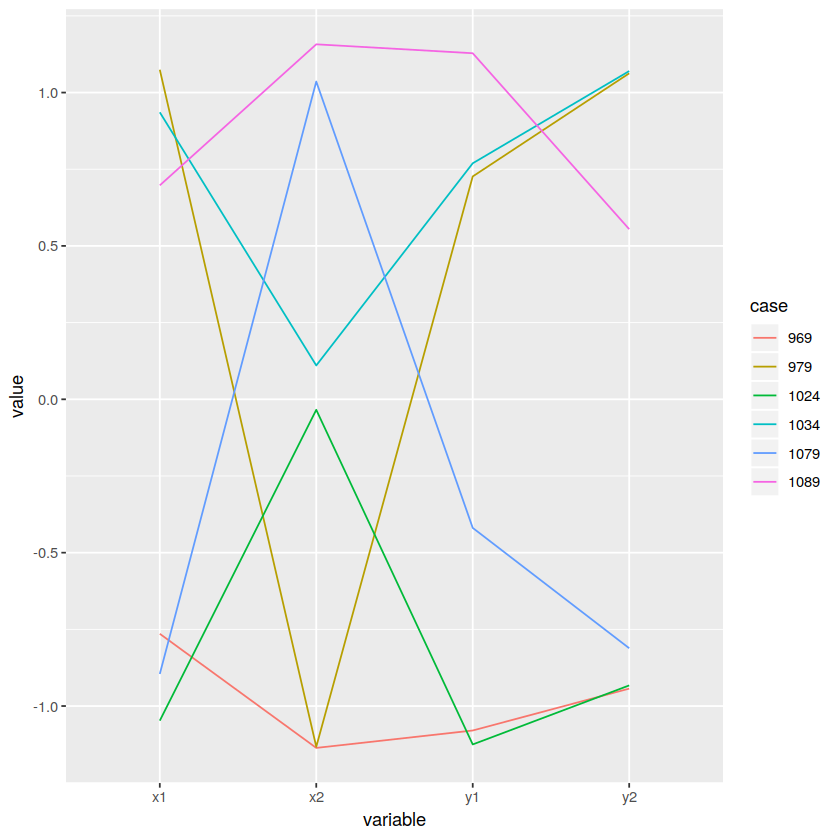

In [11]:
ggparcoord(
    s2d[x1 %in% levels2 & x2 %in% levels3 & t == 10] %>% jitter2d,
    columns=c(2:3,5:6),
    groupColumn=1
)

#### All observations at final time.

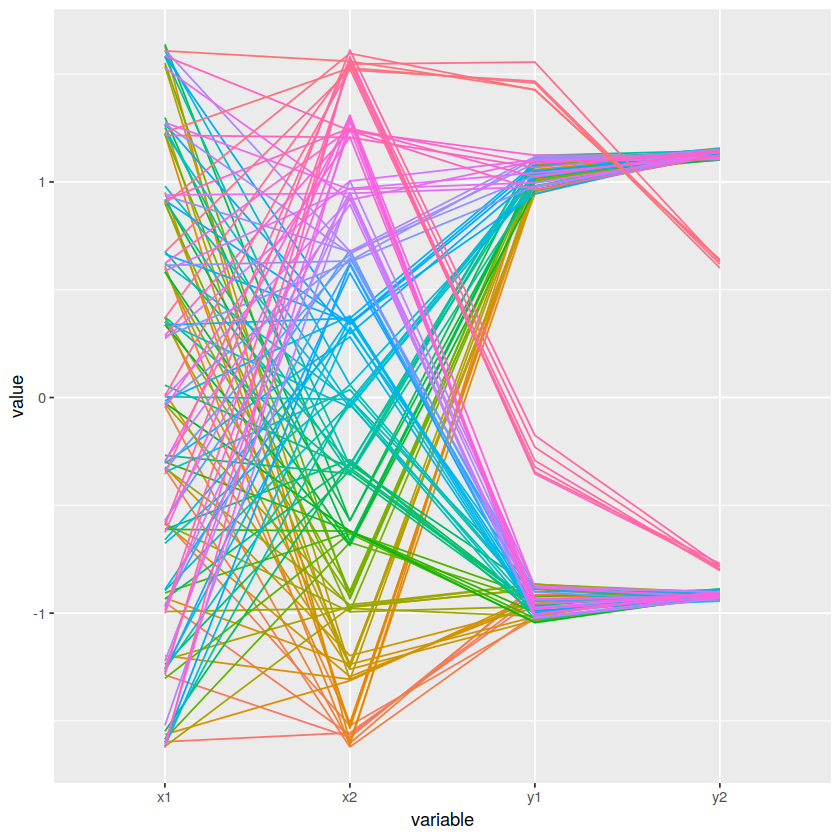

In [12]:
ggparcoord(
    s2d[t == 10] %>% jitter2d,
    columns=c(2:3,5:6),
    groupColumn=1
) + guides(color=FALSE)

#### All results at half of the final time.

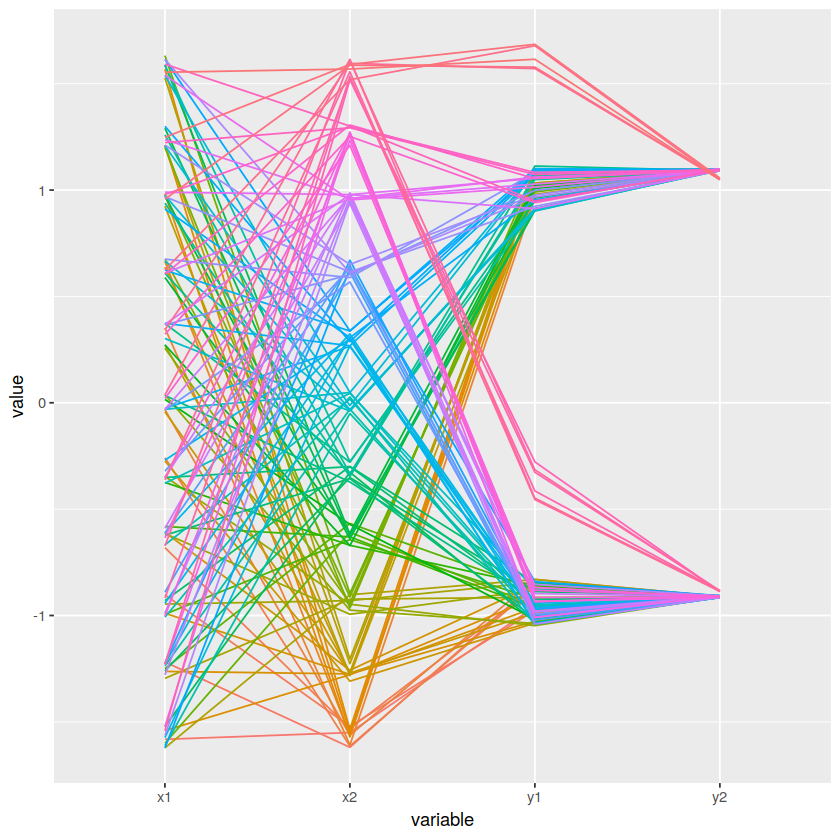

In [13]:
ggparcoord(
    s2d[t == 5] %>% jitter2d,
    columns=c(2:3,5:6),
    groupColumn=1
) + guides(color=FALSE)

### 3D dataset.

#### Three levels at the final time.

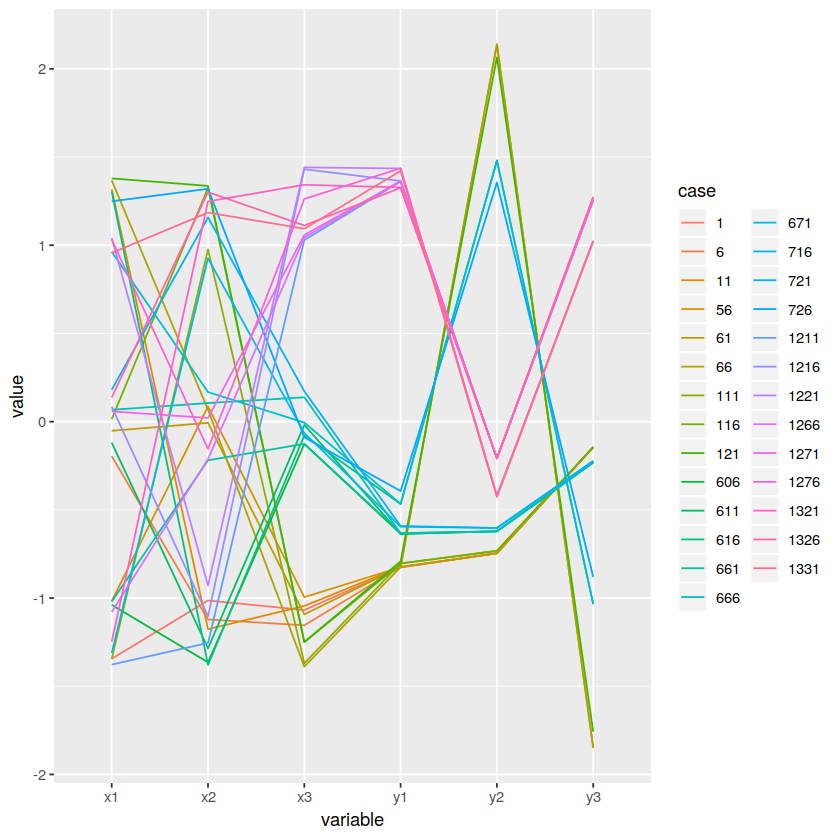

In [14]:
ggparcoord(
    s3d[x1 %in% levels3 & x2 %in% levels3 & x3 %in% levels3 & t == 10] %>% jitter3d,
    columns=c(2:4,6:8),
    groupColumn=1
)

#### All observations at final time.

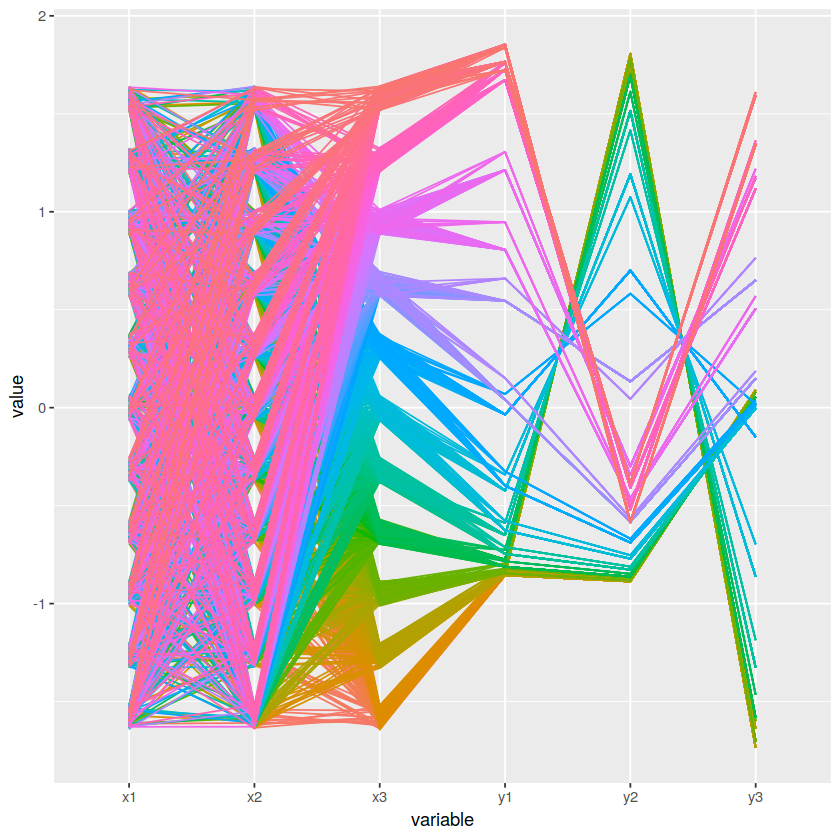

In [15]:
ggparcoord(
    s3d[t == 10] %>% jitter3d,
    columns=c(2:4,6:8),
    groupColumn=1
) + guides(color=FALSE)

#### All results at half of the final time.

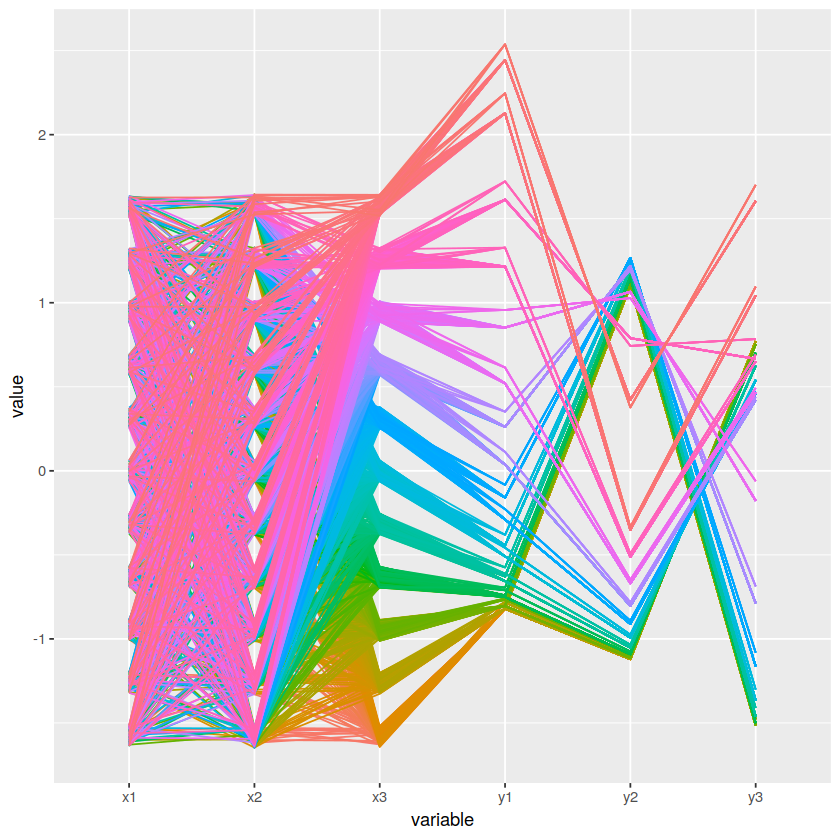

In [16]:
ggparcoord(
    s3d[t == 5] %>% jitter3d,
    columns=c(2:4,6:8),
    groupColumn=1
) + guides(color=FALSE)

## Scatterplot matrices.

### Independent and dependent variables at final time.

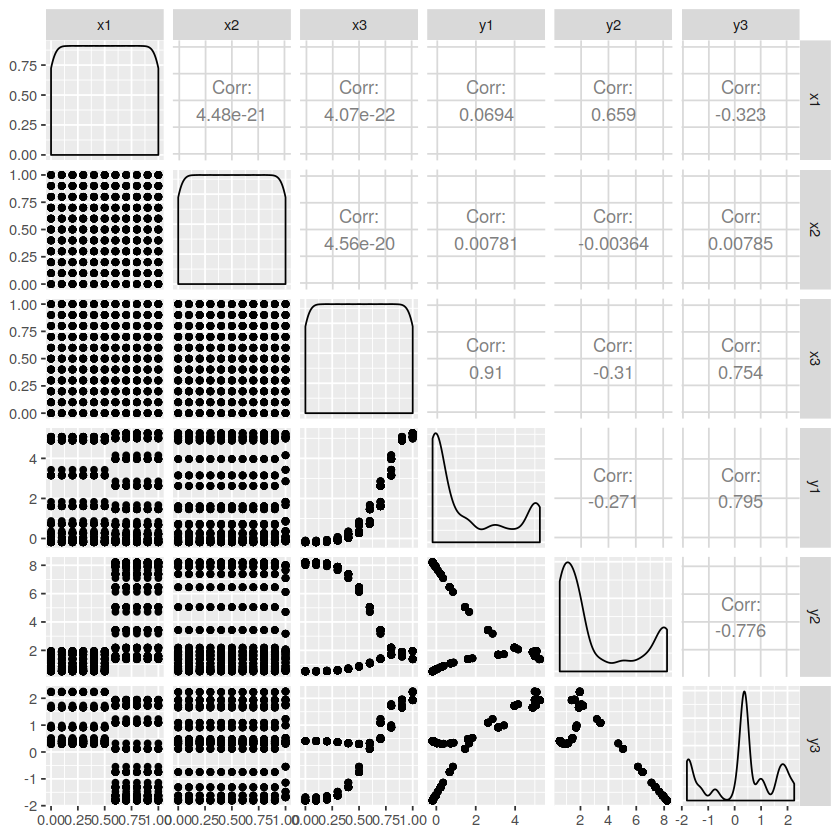

In [17]:
ggpairs(
    s3d[t == 10],
    columns=c(2:4,6:8)
)

### Dependent variables at final time.

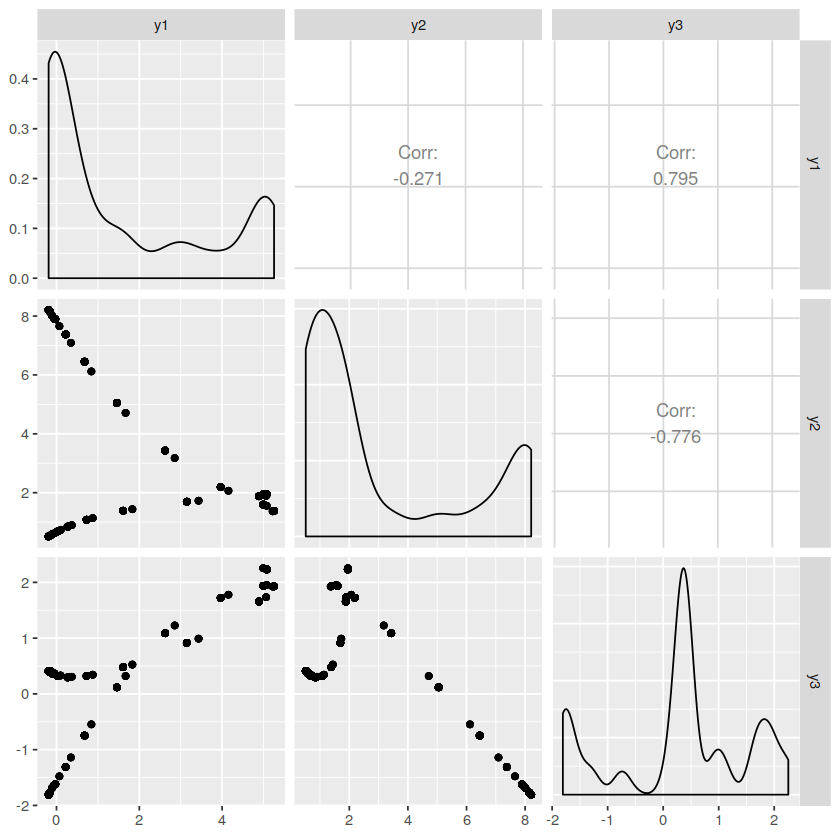

In [18]:
ggpairs(
    s3d[t == 10],
    columns=6:8
)

### Dependent variables at all times.

Warning message in cor(x, y, method = method, use = use):
“the standard deviation is zero”Warning message in cor(x, y, method = method, use = use):
“the standard deviation is zero”Warning message in cor(x, y, method = method, use = use):
“the standard deviation is zero”

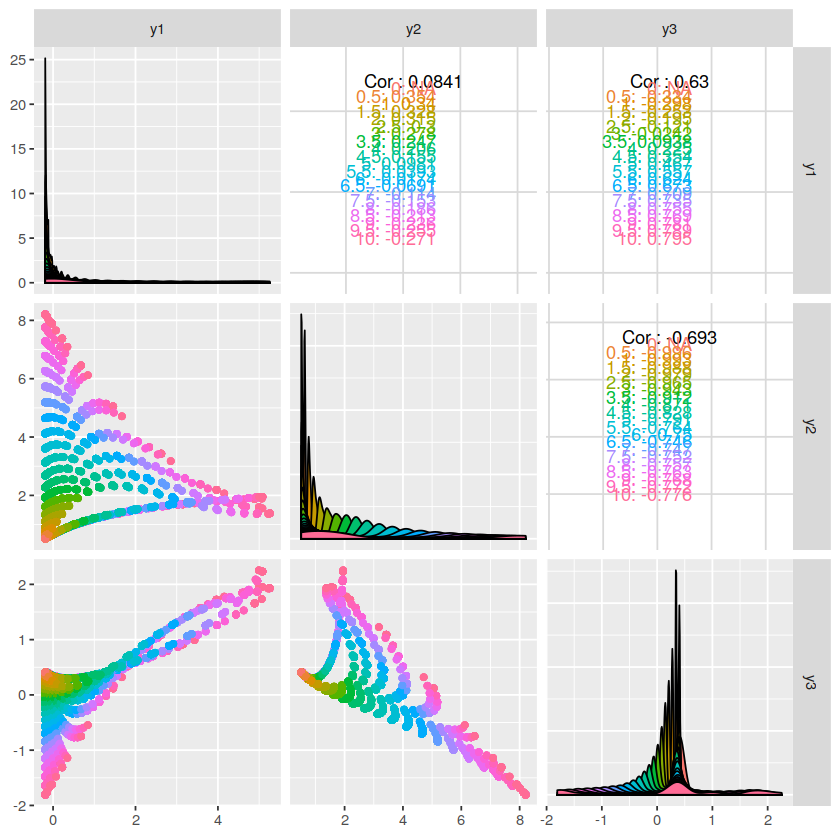

In [19]:
ggpairs(s3d, columns=6:8, mapping=aes(color=factor(t)))

## Timeseries plots conditioned by independent variables.

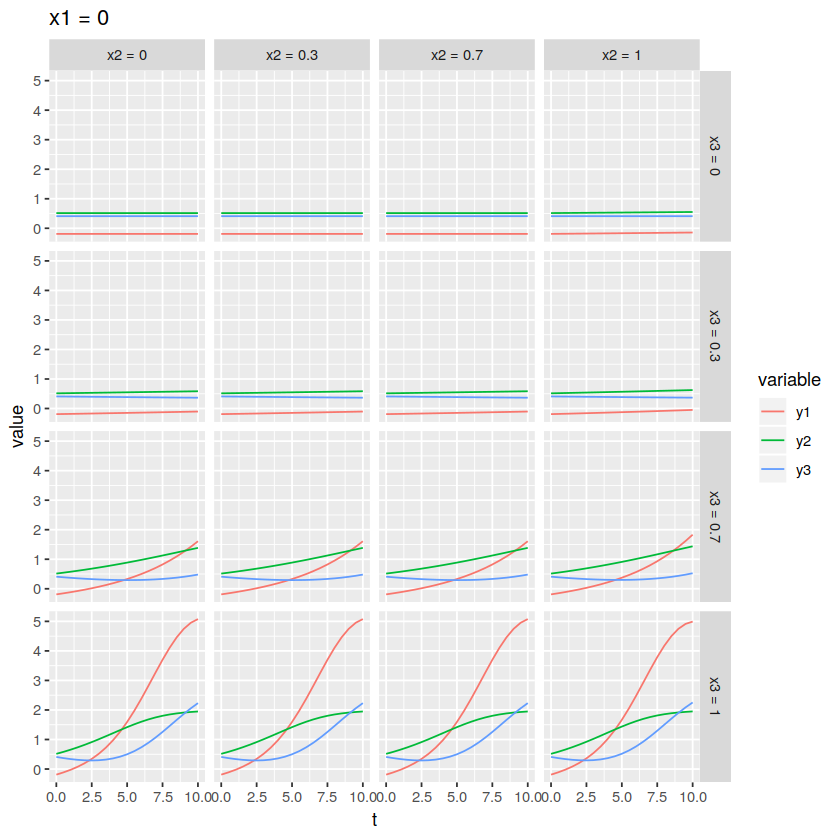

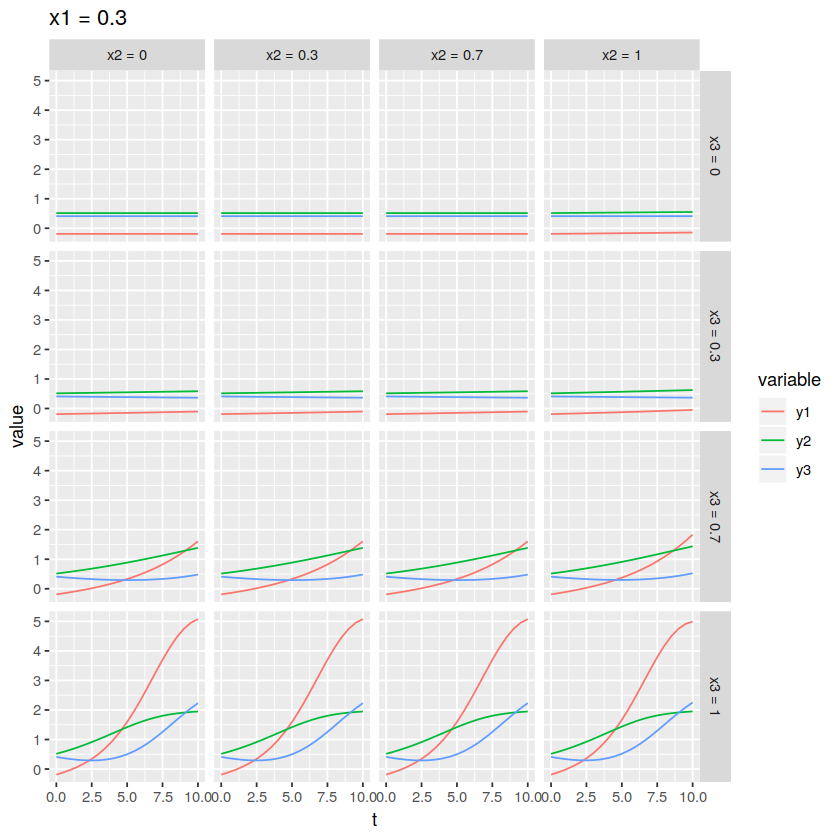

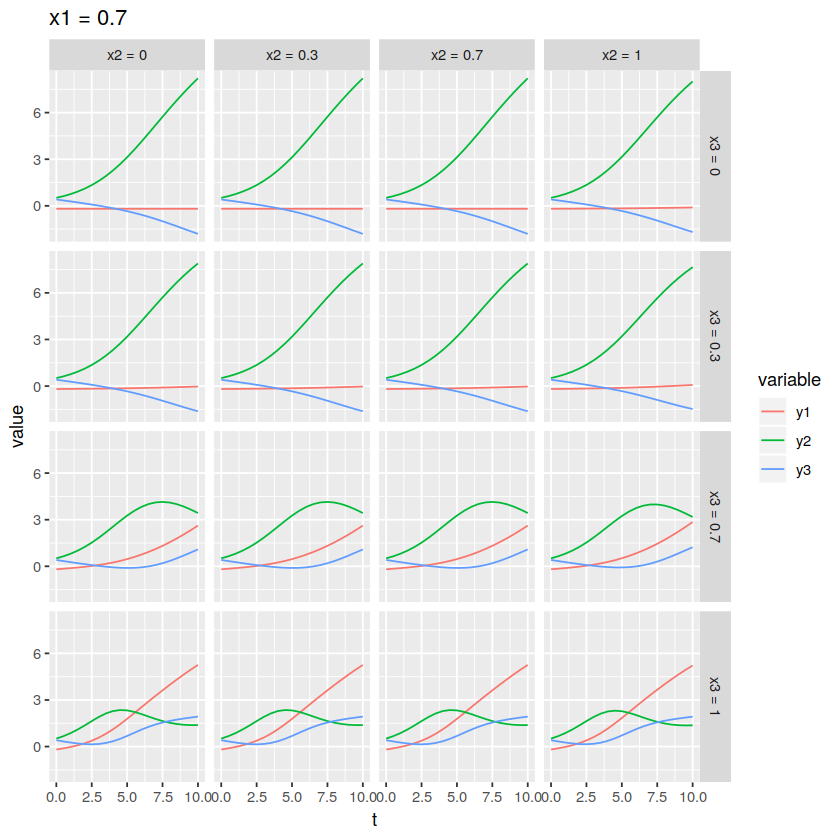

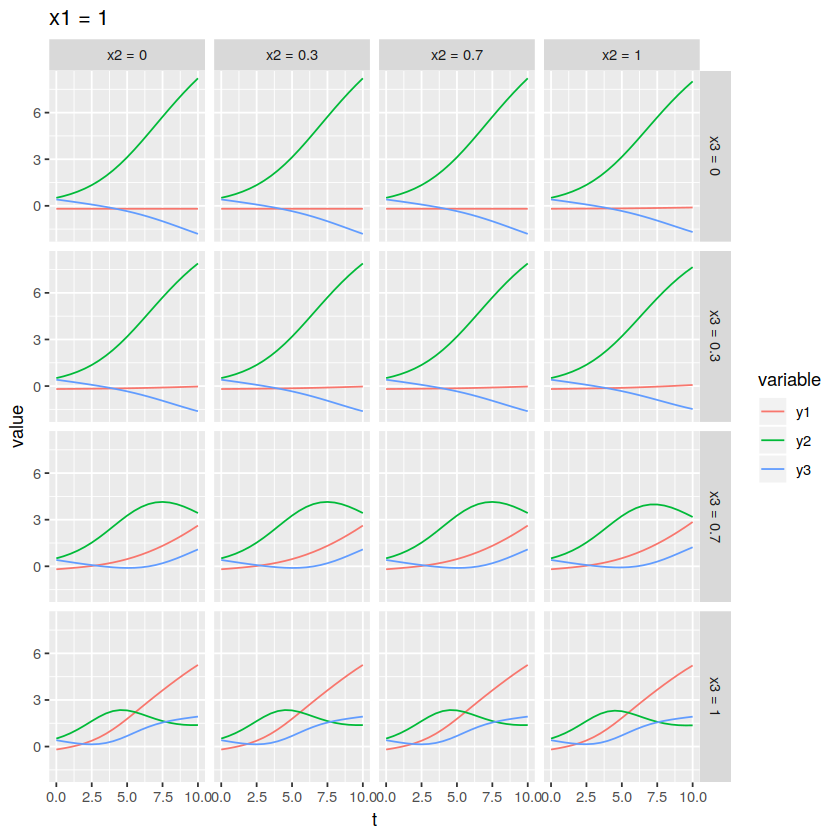

In [20]:
x2.lab <- paste("x2 =", levels4)
names(x2.lab) <- levels4
x3.lab <- paste("x3 =", levels4)
names(x3.lab) <- levels4

for (x1.value in levels4) {
    g <- ggplot(
        melt(
            s3d[x1 == x1.value & x2 %in% levels4 & x3 %in% levels4],
            id.vars=c("case", "t", "x1", "x2", "x3")
        ),
        aes(x=t, y=value, color=variable)
    ) +
        facet_grid(
            x3 ~ x2,
            labeller=labeller(x2=x2.lab, x3=x3.lab)) +
        ggtitle(paste("x1 =", x1.value)) +
        geom_line()
    print(g)
}